In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import os
%precision 3
%matplotlib inline

# 設定の記入

In [34]:
num_node_array = [9, 16, 25, 36, 49, 64]
num_node_array_original = [9, 16, 25, 36]

num_depot_array = [8]
num_depot_array_original = [8]

per_driver_array = [64]
per_driver_array_original = [64]

parameter = 5
convergence = 2

#net_per_numnode = 5
#times_per_net = 5

# 時間のまとめ(グラフ化)

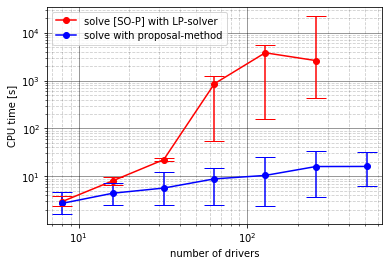

In [27]:
original_error = np.array([[0],[0]])
proposed_error = np.array([[0],[0]])
original_average = np.array([])
proposed_average = np.array([])
#print(original_error)

for num_node in num_node_array:
    for num_depot in num_depot_array:
        for per_driver in per_driver_array:
            
            num_sum_driver = per_driver * num_node * num_node
            

            
            path_accel_time = r"result/result_proposed/num_driver_{nv}/node_{nn}/depot_{nd}/time/accel_time_{nv}_{nn}_{nd}.csv".format(nv=num_sum_driver, nn=num_node, nd=num_depot)
            path_LP_time = r"result/result_proposed/num_driver_{nv}/node_{nn}/depot_{nd}/time/LP_max_time_{nv}_{nn}_{nd}.csv".format(nv=num_sum_driver, nn=num_node, nd=num_depot)

            accel_time = np.loadtxt(path_accel_time, delimiter=",")
            LP_time = np.loadtxt(path_LP_time, delimiter=",")
            #print(accel_time)
            #print(LP_time)
            #print(accel_time + LP_time)
            proposed_time = accel_time + LP_time
            proposed_average = np.hstack((proposed_average, np.sum(proposed_time)/np.size(proposed_time)))
            
            plus_error_proposed_time = np.max(proposed_time) - np.sum(proposed_time)/np.size(proposed_time)
            minus_error_proposed_time = np.sum(proposed_time)/np.size(proposed_time) - np.amin(proposed_time)
            proposed_error_0 = np.vstack((minus_error_proposed_time, plus_error_proposed_time))
            proposed_error = np.hstack((proposed_error, proposed_error_0))
            
            #print(proposed_error)
            
            
            

for num_node in num_node_array_original:
    for num_depot in num_depot_array_original:
        for per_driver in per_driver_array_original:
            
            num_sum_driver = per_driver * num_node * num_node
            
            path_original_time = r"result/result_original/num_driver_{nv}/node_{nn}/depot_{nd}/time/LP_original_time_{nv}_{nn}_{nd}.csv".format(nv=num_sum_driver, nn=num_node, nd=num_depot)
            original_time = np.loadtxt(path_original_time, delimiter=",")
            
            original_average = np.hstack((original_average, np.sum(original_time)/np.size(original_time)))
            #print(average_original_time)
            #print(original_time)
            #print(np.size(original_time))
            plus_error_original_time = np.max(original_time) - np.sum(original_time)/np.size(original_time)
            minus_error_original_time = np.sum(original_time)/np.size(original_time) - np.amin(original_time)
            #original_time = original_time.reshape([1, -1])
            #print(original_time)
            
            original_error_0 = np.vstack((minus_error_original_time, plus_error_original_time))
            original_error = np.hstack((original_error, original_error_0))
            
            

            
original_error = np.delete(original_error, 0, axis=1)
proposed_error = np.delete(proposed_error, 0, axis=1)
#print(original_error)
#print(proposed_error)
#print(original_average)
#print(proposed_average)


if np.size(per_driver_array) > 1:
    
    for num_node in num_node_array:
        for num_depot in num_depot_array:


            x_original = per_driver_array_original
            x_proposed = per_driver_array
            y_original = original_average
            y_proposed = proposed_average

            plt.plot(x_original, y_original, marker="o", label="solve [SO-P] with LP-solver", color="red")
            plt.plot(x_proposed, y_proposed, marker="o", label="solve with proposal-method", color="blue")

            plt.errorbar(x_original, y_original, yerr=original_error, fmt='none', capsize=10, color="red")
            plt.errorbar(x_proposed, y_proposed, yerr=proposed_error, fmt='none', capsize=10, color="blue")

            plt.xlabel("number of drivers")
            plt.ylabel("CPU time [s]")

            plt.xscale('log')
            plt.yscale('log')
            
            plt.grid(which='major', axis='both', color='black', alpha=0.5, linestyle='-')
            plt.grid(which="minor", axis="both", color='black', alpha=0.2, linestyle="--")

#             plt.grid(axis="x")
#             plt.grid(axis="y")

            plt.legend()

            filename = "result/img/time/png"
            os.makedirs(filename, exist_ok=True)
            #plt.show()
            plt.savefig(filename + "/time_nv_{nn}_{nd}_{para}_{conv}.png".format(nn=num_node, nd=num_depot, para=parameter, conv=convergence))

            
            filename = "result/img/time/pdf"
            os.makedirs(filename, exist_ok=True)
            #plt.show()
            plt.savefig(filename + "/time_nv_{nn}_{nd}_{para}_{conv}.pdf".format(nn=num_node, nd=num_depot, para=parameter, conv=convergence))


            summary_original = np.vstack((per_driver_array_original, original_average, original_average - original_error[0], original_average + original_error[1])).T
            summary_proposed = np.vstack((per_driver_array, proposed_average, proposed_average - proposed_error[0], proposed_average + proposed_error[1])).T

            #print(summary_accel)

            filename = "result/img/time/data"
            os.makedirs(filename, exist_ok=True)

            filename_original = filename + "/time_original_nv_{nn}_{nd}_{para}_{conv}.csv".format(nn=num_node, nd=num_depot, para=parameter, conv=convergence)
            filename_proposed = filename + "/time_proposed_nv_{nn}_{nd}_{para}_{conv}.csv".format(nn=num_node, nd=num_depot, para=parameter, conv=convergence)
            np.savetxt(filename_original, summary_original, delimiter=",")
            np.savetxt(filename_proposed, summary_proposed, delimiter=",")
            #print(original_error)

    
    
           
        
        
elif np.size(num_node_array) > 1:
    
    
    for per_driver in per_driver_array:
        for num_depot in num_depot_array:
            
            x_original = num_node_array_original
            x_proposed = num_node_array
            y_original = original_average
            y_proposed = proposed_average

            plt.plot(x_original, y_original, marker="o", label="solve [SO-P] with LP-solver", color="red")
            plt.plot(x_proposed, y_proposed, marker="o", label="solve with proposal-method", color = "blue")

            plt.errorbar(x_original, y_original, yerr=original_error, fmt='none', capsize=10, color="red")
            plt.errorbar(x_proposed, y_proposed, yerr=proposed_error, fmt='none', capsize=10, color="blue")

            plt.xlabel("number of nodes")
            plt.ylabel("CPU time [s]")

            #plt.xscale('log')
            plt.yscale('log')

            plt.grid(which='major', axis='both', color='black', alpha=0.5, linestyle='-')
            plt.grid(which="minor", axis="both", color='black', alpha=0.2, linestyle="--")

#             plt.grid(axis="x")
#             plt.grid(axis="y")

            plt.legend()

            filename = "result/img/time/png"
            os.makedirs(filename, exist_ok=True)
            #plt.show()
            plt.savefig(filename + "/time_{nv}_nn_{nd}_{para}_{conv}.png".format(nv=per_driver, nd=num_depot, para=parameter, conv=convergence))

            filename = "result/img/time/pdf"
            os.makedirs(filename, exist_ok=True)
            #plt.show()
            plt.savefig(filename + "/time_{nv}_nn_{nd}_{para}_{conv}.pdf".format(nv=per_driver, nd=num_depot, para=parameter, conv=convergence))

            
            
            summary_original = np.vstack((num_node_array_original, original_average, original_average - original_error[0], original_average + original_error[1])).T
            summary_proposed = np.vstack((num_node_array, proposed_average, proposed_average - proposed_error[0], proposed_average + proposed_error[1])).T

            #print(summary_accel)

            filename = "result/img/time/data"
            os.makedirs(filename, exist_ok=True)

            filename_original = filename + "/time_original_{nv}_nn_{nd}_{para}_{conv}.csv".format(nv=per_driver, nd=num_depot, para=parameter, conv=convergence)
            filename_proposed = filename + "/times_proposed_{nv}_nn_{nd}_{para}_{conv}.csv".format(nv=per_driver, nd=num_depot, para=parameter, conv=convergence)
            np.savetxt(filename_original, summary_original, delimiter=",")
            np.savetxt(filename_proposed, summary_proposed, delimiter=",")





    
else:
    
    for per_driver in per_driver_array:
        for num_node in num_node_array:
    
            x_original = num_depot_array_original
            x_proposed = num_depot_array
            y_original = original_average
            y_proposed = proposed_average

            plt.plot(x_original, y_original, marker="o", label="solve [SO-P] with LP-solver", color="red")
            plt.plot(x_proposed, y_proposed, marker="o", label="solve with proposal-method", color="blue")

            plt.errorbar(x_original, y_original, yerr=original_error, fmt='none', capsize=10, color="red")
            plt.errorbar(x_proposed, y_proposed, yerr=proposed_error, fmt='none', capsize=10, color="blue")

            plt.xlabel("number of depots")
            plt.ylabel("CPU time [s]")

#             plt.xscale('log')
            plt.yscale('log')

            plt.grid(which='major', axis='both', color='black', alpha=0.5, linestyle='-')
            plt.grid(which="minor", axis="both", color='black', alpha=0.2, linestyle="--")

#             plt.grid(axis="x")
#             plt.grid(axis="y")

            plt.legend()

            
            
            filename = "result/img/time/png"
            os.makedirs(filename, exist_ok=True)
            #plt.show()
            plt.savefig(filename + "/time_{nv}_{nn}_nd_{para}_{conv}.png".format(nv=per_driver, nn=num_node, para=parameter, conv=convergence))

            filename = "result/img/time/pdf"
            os.makedirs(filename, exist_ok=True)
            #plt.show()
            plt.savefig(filename + "/time_{nv}_{nn}_nd_{para}_{conv}.pdf".format(nv=per_driver, nn=num_node, para=parameter, conv=convergence))

            
            
            summary_original = np.vstack((num_depot_array_original, original_average, original_average - original_error[0], original_average + original_error[1])).T
            summary_proposed = np.vstack((num_depot_array, proposed_average, proposed_average - proposed_error[0], proposed_average + proposed_error[1])).T

            #print(summary_accel)

            filename = "result/img/time/data"
            os.makedirs(filename, exist_ok=True)

            filename_original = filename + "/time_original_{nv}_{nn}_nd_{para}_{conv}.csv".format(nv=per_driver, nn=num_node, para=parameter, conv=convergence)
            filename_proposed = filename + "/time_proposed_{nv}_{nn}_nd_{para}_{conv}.csv".format(nv=per_driver, nn=num_node, para=parameter, conv=convergence)
            np.savetxt(filename_original, summary_original, delimiter=",")
            np.savetxt(filename_proposed, summary_proposed, delimiter=",")



# 目的関数値の誤差のまとめ(グラフ化)

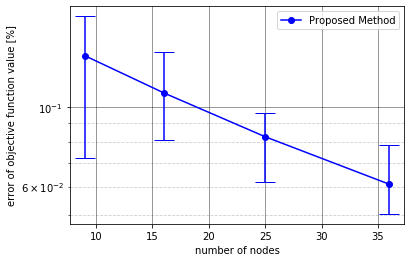

In [35]:
accel_error_error = np.array([[0],[0]])
proposed_error_error = np.array([[0],[0]])
accel_error_average = np.array([])
proposed_error_average = np.array([])
#print(original_error)

for num_node in num_node_array_original:
    for num_depot in num_depot_array_original:
        for per_driver in per_driver_array_original:
            
            num_sum_driver = per_driver * num_node * num_node
            
            path_original_obj = r"result/result_original/num_driver_{nv}/node_{nn}/depot_{nd}/obj/LP_original_obj_{nv}_{nn}_{nd}.csv".format(nv=num_sum_driver, nn=num_node, nd=num_depot)
            original_obj = np.loadtxt(path_original_obj, delimiter=",")
            
            
            path_accel_obj = r"result/result_proposed/num_driver_{nv}/node_{nn}/depot_{nd}/obj/accel_obj_{nv}_{nn}_{nd}.csv".format(nv=num_sum_driver, nn=num_node, nd=num_depot)
            path_proposed_obj = r"result/result_proposed/num_driver_{nv}/node_{nn}/depot_{nd}/obj/proposed_obj_{nv}_{nn}_{nd}.csv".format(nv=num_sum_driver, nn=num_node, nd=num_depot)

            
            accel_obj = np.loadtxt(path_accel_obj, delimiter=",")
            proposed_obj = np.loadtxt(path_proposed_obj, delimiter=",")
            
            
            accel_error = np.abs(accel_obj - original_obj)/np.abs(original_obj) * 100
            proposed_error = np.abs(proposed_obj - original_obj)/np.abs(original_obj) * 100
            
            
            accel_error_average = np.hstack((accel_error_average, np.sum(accel_error)/np.size(accel_error)))
            proposed_error_average = np.hstack((proposed_error_average, np.sum(proposed_error)/np.size(proposed_error)))
            
            plus_accel_error = np.max(accel_error) - np.sum(accel_error)/np.size(accel_error)
            minus_accel_error = np.sum(accel_error)/np.size(accel_error) - np.amin(accel_error)
            plus_proposed_error = np.max(proposed_error) - np.sum(proposed_error)/np.size(proposed_error)
            minus_proposed_error = np.sum(proposed_error)/np.size(proposed_error) - np.amin(proposed_error)
            
            
            
            
            accel_error_error_0 = np.vstack((minus_accel_error, plus_accel_error))
            accel_error_error = np.hstack((accel_error_error, accel_error_error_0))
            proposed_error_error_0 = np.vstack((minus_proposed_error, plus_proposed_error))
            proposed_error_error = np.hstack((proposed_error_error, proposed_error_error_0))
            

            
            
accel_error_error = np.delete(accel_error_error, 0, axis=1)
proposed_error_error = np.delete(proposed_error_error, 0, axis=1)
#print(original_error)
#print(proposed_error)
#print(original_average)
#print(proposed_average)


if np.size(per_driver_array_original) > 1:
    
    
    for num_node in num_node_array_original:
        for num_depot in num_depot_array_original:

            x = per_driver_array_original
            y_accel = accel_error_average
            y_proposed = proposed_error_average

#             plt.plot(x, y_accel, marker="o", label="Accelerated Gradient Method", color="cornflowerblue")
            plt.plot(x, y_proposed, marker="o", label="Proposed Method", color="blue")

#             plt.errorbar(x, y_accel, yerr=accel_error_error, fmt='none', capsize=10, color="cornflowerblue")
            plt.errorbar(x, y_proposed, yerr=proposed_error_error, fmt='none', capsize=10, color="blue")

            plt.xlabel("number of drivers")
            plt.ylabel("error of objective function value [%]")

            plt.xscale('log')
            plt.yscale('log')

            plt.grid(which='major', axis='both', color='black', alpha=0.5, linestyle='-')
            plt.grid(which="minor", axis="both", color='black', alpha=0.2, linestyle="--")

#             plt.grid(axis="x")
#             plt.grid(axis="y")
            plt.legend()

            filename = "result/img/obj_error/png"
            os.makedirs(filename, exist_ok=True)
            #plt.show()
            plt.savefig(filename + "/error_nv_{nn}_{nd}_{para}_{conv}.png".format(nn=num_node, nd=num_depot, para=parameter, conv=convergence))

            filename = "result/img/obj_error/pdf"
            os.makedirs(filename, exist_ok=True)
            #plt.show()
            plt.savefig(filename + "/error_nv_{nn}_{nd}_{para}_{conv}.pdf".format(nn=num_node, nd=num_depot, para=parameter, conv=convergence))

            
        #     print(num_driver_array)
        #     print(accel_error_average)
        #     print(accel_error_error)
        #     print(accel_error_error + accel_error_average)


            summary_accel = np.vstack((per_driver_array_original, accel_error_average, accel_error_average - accel_error_error[0], accel_error_average + accel_error_error[1])).T
            summary_proposed = np.vstack((per_driver_array_original, proposed_error_average, proposed_error_average - proposed_error_error[0], proposed_error_average + proposed_error_error[1])).T

            #print(summary_accel)

            filename = "result/img/obj_error/data"
            os.makedirs(filename, exist_ok=True)

            filename_accel = filename + "/error_accel_nv_{nn}_{nd}_{para}_{conv}.csv".format(nn=num_node, nd=num_depot, para=parameter, conv=convergence)
            filename_proposed = filename + "/error_proposed_nv_{nn}_{nd}_{para}_{conv}.csv".format(nn=num_node, nd=num_depot, para=parameter, conv=convergence)
            np.savetxt(filename_accel, summary_accel, delimiter=",")
            np.savetxt(filename_proposed, summary_proposed, delimiter=",")


elif np.size(num_node_array_original) > 1:
                
    
    for per_driver in per_driver_array_original:
        for num_depot in num_depot_array_original:
            x = num_node_array_original
            y_accel = accel_error_average
            y_proposed = proposed_error_average

#             plt.plot(x, y_accel, marker="o", label="Accelerated Gradient Method", color="cornflowerblue")
            plt.plot(x, y_proposed, marker="o", label="Proposed Method", color="blue")

#             plt.errorbar(x, y_accel, yerr=accel_error_error, fmt='none', capsize=10, color="cornflowerblue")
            plt.errorbar(x, y_proposed, yerr=proposed_error_error, fmt='none', capsize=10, color="blue")

            plt.xlabel("number of nodes")
            plt.ylabel("error of objective function value [%]")

            #plt.xscale('log')
            plt.yscale('log')

            plt.grid(which='major', axis='both', color='black', alpha=0.5, linestyle='-')
            plt.grid(which="minor", axis="both", color='black', alpha=0.2, linestyle="--")

#             plt.grid(axis="x")
#             plt.grid(axis="y")

            plt.legend()

            filename = "result/img/obj_error/png"
            os.makedirs(filename, exist_ok=True)
            #plt.show()
            plt.savefig(filename + "/error_{nv}_nn_{nd}_{para}_{conv}.png".format(nv=per_driver, nd=num_depot, para=parameter, conv=convergence*per_driver))

            filename = "result/img/obj_error/pdf"
            os.makedirs(filename, exist_ok=True)
            #plt.show()
            plt.savefig(filename + "/error_{nv}_nn_{nd}_{para}_{conv}.pdf".format(nv=per_driver, nd=num_depot, para=parameter, conv=convergence*per_driver))

            
            
        #     print(num_driver_array)
        #     print(accel_error_average)
        #     print(accel_error_error)
        #     print(accel_error_error + accel_error_average)



            summary_accel = np.vstack((num_node_array_original, accel_error_average, accel_error_average - accel_error_error[0], accel_error_average + accel_error_error[1])).T
            summary_proposed = np.vstack((num_node_array_original, proposed_error_average, proposed_error_average - proposed_error_error[0], proposed_error_average + proposed_error_error[1])).T

            #print(summary_accel)

            filename = "result/img/obj_error/data"
            os.makedirs(filename, exist_ok=True)

            filename_accel = filename + "/error_accel_{nv}_nn_{nd}_{para}_{conv}.csv".format(nv=per_driver, nd=num_depot, para=parameter, conv=convergence*per_driver)
            filename_proposed = filename + "/error_proposed_{nv}_nn_{nd}_{para}_{conv}.csv".format(nv=per_driver, nd=num_depot, para=parameter, conv=convergence*per_driver)
            np.savetxt(filename_accel, summary_accel, delimiter=",")
            np.savetxt(filename_proposed, summary_proposed, delimiter=",")



    
else:
    
    for per_driver in per_driver_array:
        for num_node in num_node_array:
                
            x = num_depot_array_original
            y_accel = accel_error_average
            y_proposed = proposed_error_average

#             plt.plot(x, y_accel, marker="o", label="Accelerated Gradient Method", color="cornflowerblue")
            plt.plot(x, y_proposed, marker="o", label="Proposed Method", color="blue")

#             plt.errorbar(x, y_accel, yerr=accel_error_error, fmt='none', capsize=10, color="cornflowerblue")
            plt.errorbar(x, y_proposed, yerr=proposed_error_error, fmt='none', capsize=10, color="blue")

            plt.xlabel("number of depots")
            plt.ylabel("error of objective function value [%]")

            #plt.xscale('log')
            plt.yscale('log')

            plt.grid(which='major', axis='both', color='black', alpha=0.5, linestyle='-')
            plt.grid(which="minor", axis="both", color='black', alpha=0.2, linestyle="--")

#             plt.grid(axis="x")
#             plt.grid(axis="y")

            plt.legend()

            filename = "result/img/obj_error/png"
            os.makedirs(filename, exist_ok=True)
            #plt.show()
            plt.savefig(filename + "/error_{nv}_{nn}_nd_{para}_{conv}.png".format(nv=per_driver, nn=num_node, para=parameter, conv=convergence*per_driver))

            filename = "result/img/obj_error/pdf"
            os.makedirs(filename, exist_ok=True)
            #plt.show()
            plt.savefig(filename + "/error_{nv}_{nn}_nd_{para}_{conv}.pdf".format(nv=per_driver, nn=num_node, para=parameter, conv=convergence*per_driver))



            summary_accel = np.vstack((num_depot_array_original, accel_error_average, accel_error_average - accel_error_error[0], accel_error_average + accel_error_error[1])).T
            summary_proposed = np.vstack((num_depot_array_original, proposed_error_average, proposed_error_average - proposed_error_error[0], proposed_error_average + proposed_error_error[1])).T

            #print(summary_accel)

            filename = "result/img/obj_error/data"
            os.makedirs(filename, exist_ok=True)

            filename_accel = filename + "/error_accel_{nv}_{nn}_nd_{para}_{conv}.csv".format(nv=per_driver, nn=num_node, para=parameter, conv=convergence*per_driver)
            filename_proposed = filename + "/error_proposed_{nv}_{nn}_nd_{para}_{conv}.csv".format(nv=per_driver, nn=num_node, para=parameter, conv=convergence*per_driver)
            np.savetxt(filename_accel, summary_accel, delimiter=",")
            np.savetxt(filename_proposed, summary_proposed, delimiter=",")

            print(proposed_error_average)

           

# 自作したい場合

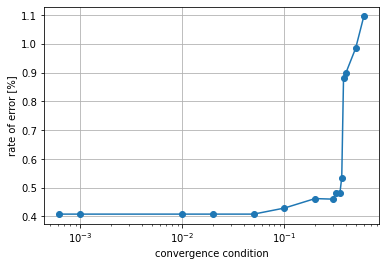

In [61]:
# 現在
# パラメータを変化させる，ノード数:9，タスク起点数:2，ドライバー数:16200
#---------------------------------------------------------------------------------------

x = [0.000625, 0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3,
     0.32, 0.35, 0.365, 0.38, 0.4, 0.5, 0.6]
y = [0.408, 0.408, 0.408, 0.408, 0.408, 0.429, 0.462, 0.46,
     0.481, 0.481, 0.535, 0.882, 0.898, 0.985, 1.095]
x2 = []
y2 = [13.3, 12.3, 576.9, 1175.8, 4710.7]
y_error = [[]]

    
plt.plot(x, y, marker="o", label="label")
#plt.plot(x2, y2, marker="o", label="label2")
#plt.errorbar(x, y, yerr=y_error, fmt='none', capsize=10)
  
plt.xlabel("convergence condition")
plt.ylabel("rate of error [%]")

plt.xscale('log')
#plt.yscale('log')

plt.grid(axis="x")
plt.grid(axis="y")
#plt.legend()

filename = "result/img/free_graph/png"
os.makedirs(filename, exist_ok=True)


plt.savefig(filename + "/error_16_25_8.png")